# Multi-Class Prediction of Obesity Risk
### Kaggle Competition

column max_columns daisplay [fix](https://github.com/jupyterlab/jupyterlab/issues/14625#issuecomment-1722137537) for Firefox

Firstly, we work with the [original](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset

#### Packages and Libraries:
 * Plotly

## Data Preprocessing
Firstly, we'll work with the [original](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset

In [31]:
import pandas as pd
from IPython.display import display, HTML
pd.set_option('display.max_columns', 85)
pd.option_context("display.max_rows", 10, "display.max_columns", 18)
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>")) # column width display fix for Firefox

df = pd.read_csv('data/ObesityDataSet.csv') # Original dataset 

pd.options.display.max_columns = None
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [32]:
df.SMOKE.value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


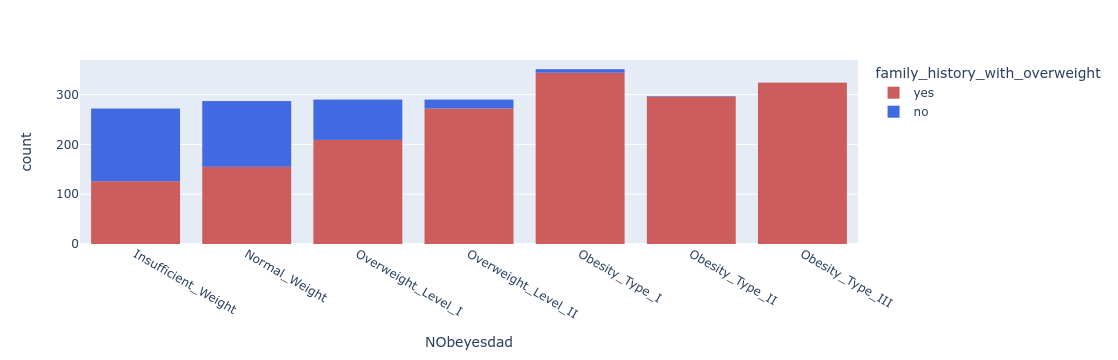

In [33]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import plotly.express as px
color_map = {'yes': 'indianred', 'no': 'royalblue'}

# obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
#                  'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

obesity_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 
              'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}

print(df.NObeyesdad.unique())
px.histogram(df, x='NObeyesdad', color='family_history_with_overweight', 
             category_orders={'NObeyesdad': list(obesity_map)}, color_discrete_map=color_map) # .update_xaxes(categoryorder='total ascending')

*NObeyesdad* column will serve as our *target attribute*, also known as ***ground truth***

As we may observe from the histogram, the distribution of weight categories is approximately equal. 
Additionally, we may note the impact of genetics on the occurrence of obesity. 
Among participants categorised as "Insufficient Weight", "Normal Weight" and "Overweight Level I" a significant number have no family history of obesity. This suggests a correlation between genetic predisposition and obesity occurrence. Interestingly, the more severe the overweight category, the fewer people report family history with overweight.

We will create heatmaps in order to examine the influence of specific characteristics and obesity.

We will create heatmaps in order to perform a more thorough examination of the influence of specific features on obesity.

For that reason we ought to convert non-numerical entries into numbers

# Clean the data

------------------- columns with floats -------------------

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']
-----------------------------------------------------------

['Age', 'Height', 'Weight', 'FCVC']
['CH2O', 'FAF', 'TUE', 'NObeyesdad']


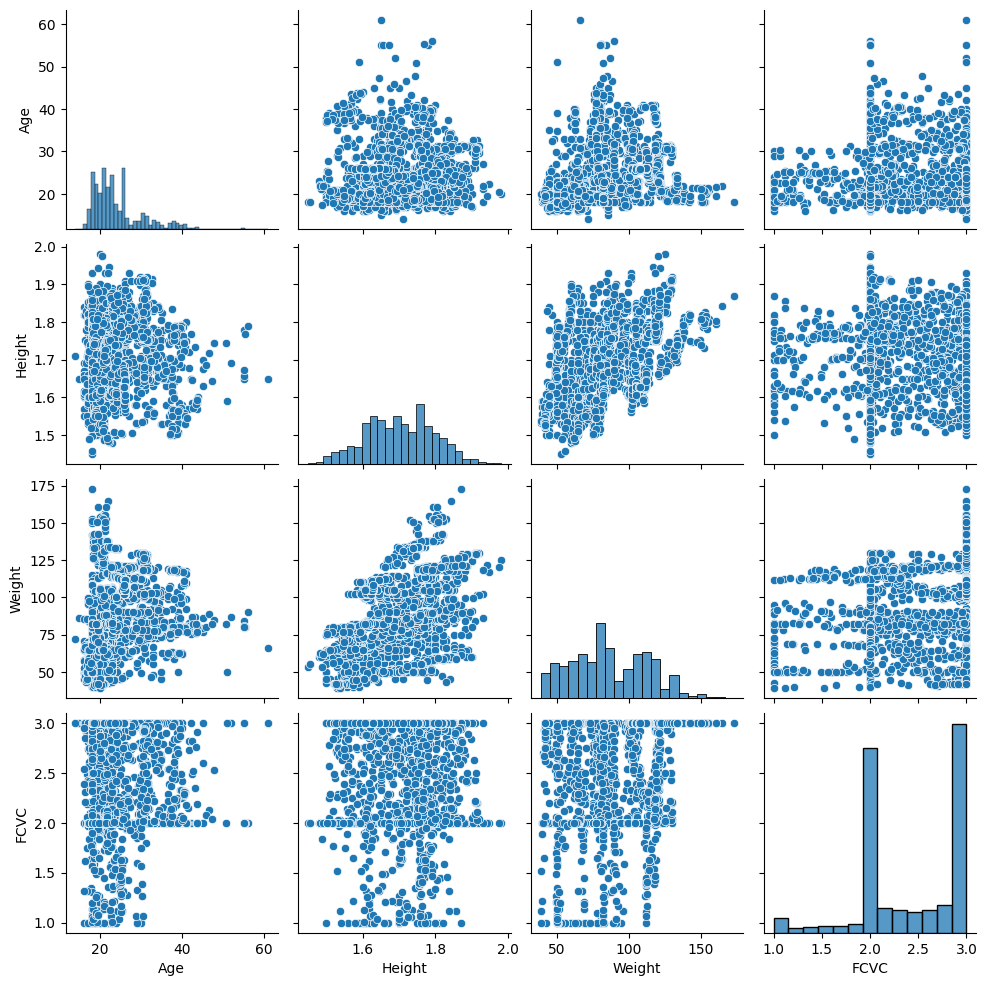

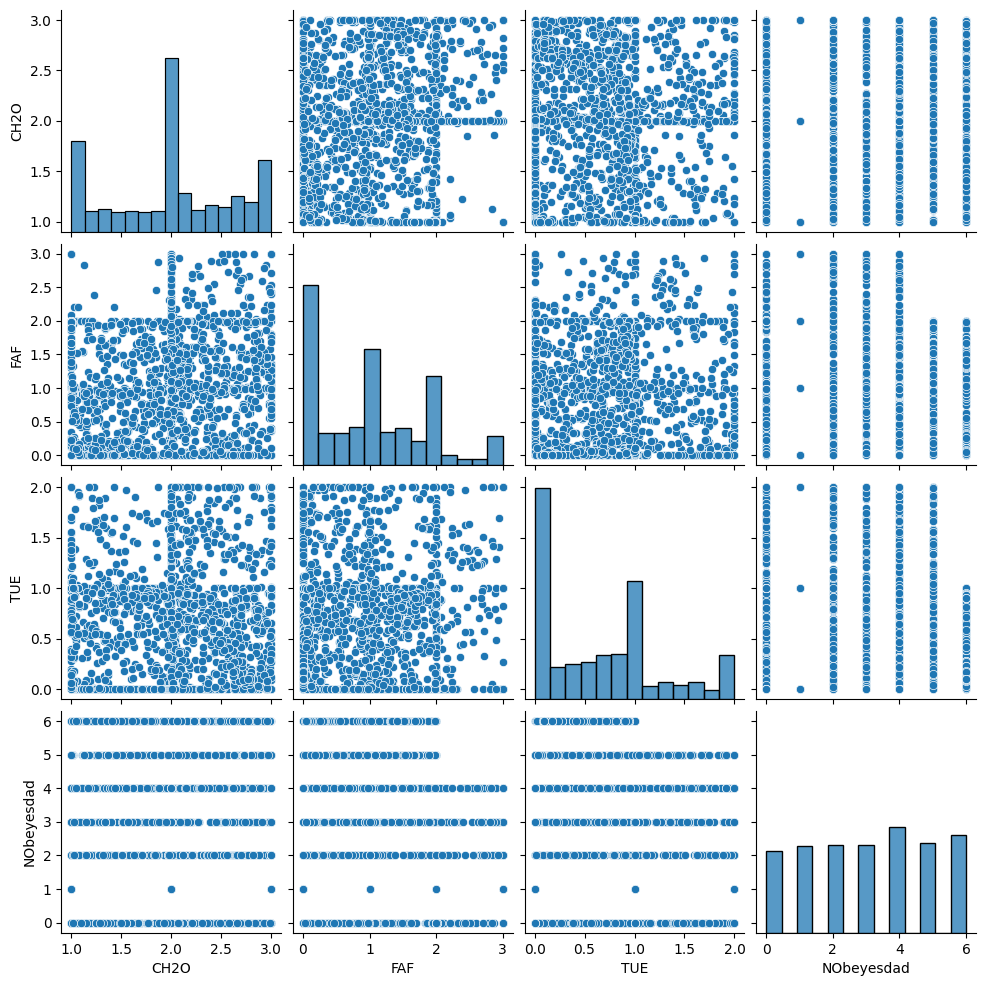

In [62]:
import seaborn as sb
# select integer columns
float_cols = list(df.select_dtypes(include=['int', 'float']).columns)
sublist = [float_cols[i:i+4] for i in range(0, len(float_cols), 5)]
print("------------------- columns with floats -------------------\n")
print(float_cols)
print("-----------------------------------------------------------\n")
for sub in sublist:
  print(f"{sub}")
  sb.pairplot(df[sub].dropna())

In [73]:
minors = df[df.Age > 50]
print(minors)

            Age    Height     Weight  FCVC  NCP      CH2O       FAF  TUE  \
21    52.000000  1.690000  87.000000   3.0  1.0  2.000000  0.000000  0.0   
92    55.000000  1.780000  84.000000   3.0  4.0  3.000000  3.000000  0.0   
133   61.000000  1.650000  66.000000   3.0  3.0  2.000000  1.000000  1.0   
161   55.000000  1.650000  80.000000   2.0  3.0  2.000000  1.000000  0.0   
232   51.000000  1.590000  50.000000   3.0  3.0  3.000000  2.000000  0.0   
252   56.000000  1.790000  90.000000   2.0  3.0  2.000000  1.000000  0.0   
1013  55.246250  1.769269  80.491339   2.0  3.0  2.000000  1.000000  0.0   
1034  50.832559  1.745528  82.130728   2.0  3.0  1.774778  0.943266  0.0   
1088  55.137881  1.657221  80.993213   2.0  3.0  2.000000  1.000000  0.0   
1158  55.022494  1.673394  80.400306   2.0  3.0  2.000000  1.000000  0.0   

      NObeyesdad  
21             4  
92             2  
133            1  
161            3  
232            1  
252            3  
1013           3  
1034       

#### Convert to numerical representation

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [43]:
for i in list(df.columns):
    if df[i].dtype != 'float64' and df[i].dtype != 'int64':
        print(f"{i}: {df[i].unique()}")
        df.drop(i, axis=1, inplace=True)

In [35]:
# drinking_map = {"no": 0, "sometimes": 1, "frequently": 2, "always": 3}
# df['CAEC'] = df['CAEC'].str.strip().str.lower().map(drinking_map)

# redefined - to be removed
obesity_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 
              'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6} 
df['NObeyesdad'] = df['NObeyesdad'].str.strip().map(obesity_map)
# drink_no = df[df.CAEC.str.strip().str.lower() == 'no'] # 0
# drink_some = df[df.CAEC.str.strip().str.lower() == 'sometimes'] # 1
# drink_freq = df[df.CAEC.str.strip().str.lower() == 'frequently'] # 2
# drink_always = df[df.CAEC.str.strip().str.lower() == 'always'] # 3

# print(len(drink_no))
# print(len(drink_always))
# print(len(drink_freq))
# print(len(drink_some))


In [157]:
df.NObeyesdad

0       1
1       1
2       1
3       2
4       3
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: int64

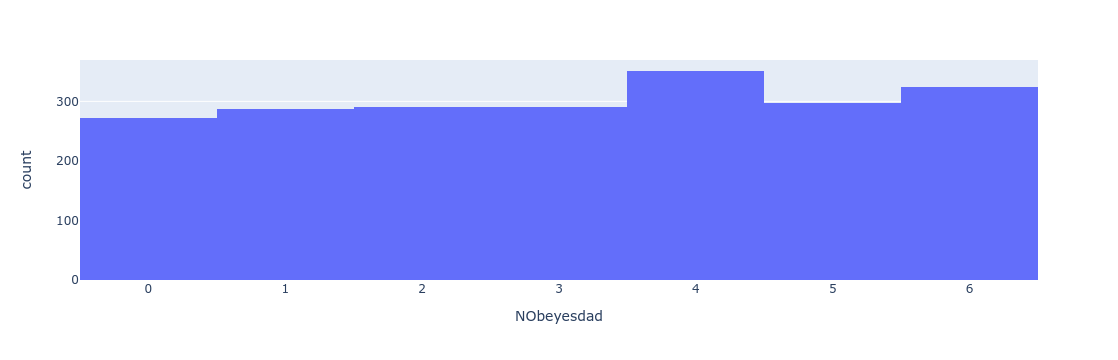

In [158]:
px.histogram(df, x='NObeyesdad')

In [137]:
df.CAEC.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2111 entries, 0 to 2110
Series name: CAEC
Non-Null Count  Dtype
--------------  -----
2111 non-null   int64
dtypes: int64(1)
memory usage: 16.6 KB


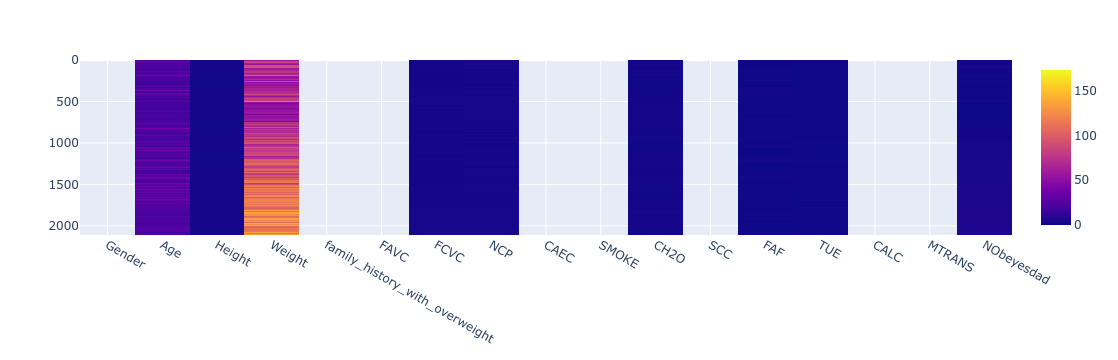

In [160]:
tefig = px.imshow(df)
tefig

In [168]:
import pandas as pd
import plotly.express as px

# Selecting columns including the numeric target label
selected_columns = ['Age', 'Height', 'Weight', 'NObeyesdad']
df_selected = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = df_selected.corr()

# Creating the heatmap
fig = px.imshow(correlation_matrix, 
                text_auto=True,  # Display correlation values on the heatmap
                aspect="auto",  # Adjust aspect ratio
                zmax=6
                color_continuous_scale='RdBu_r')  # Color scale for visualization

# Updating layout for better readability
fig.update_layout(
    title='Correlation Heatmap with Target Label',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis = dict(tickmode = 'array', tickvals = list(range(len(df_selected.columns))), ticktext = df_selected.columns),
    yaxis = dict(tickmode = 'array', tickvals = list(range(len(df_selected.columns))), ticktext = df_selected.columns)
)

fig.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3460346736.py, line 15)

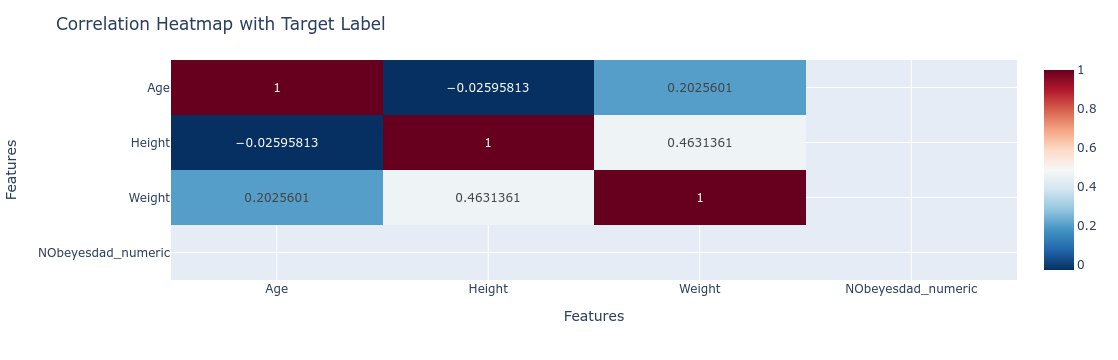

In [169]:
import pandas as pd
import plotly.express as px

# Mapping the target label to numerical values
obesity_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 
               'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
df['NObeyesdad_numeric'] = df['NObeyesdad'].map(obesity_map)

# Selecting columns including the numeric target label
selected_columns = ['Age', 'Height', 'Weight', 'NObeyesdad_numeric']
df_selected = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = df_selected.corr()

# Creating the heatmap
fig = px.imshow(correlation_matrix, 
                text_auto=True,  # Display correlation values on the heatmap
                aspect="auto",  # Adjust aspect ratio
                color_continuous_scale='RdBu_r')  # Color scale for visualization

# Updating layout for better readability
fig.update_layout(
    title='Correlation Heatmap with Target Label',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickmode='array', tickvals=list(range(len(df_selected.columns))), ticktext=df_selected.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(df_selected.columns))), ticktext=df_selected.columns)
)

fig.show()


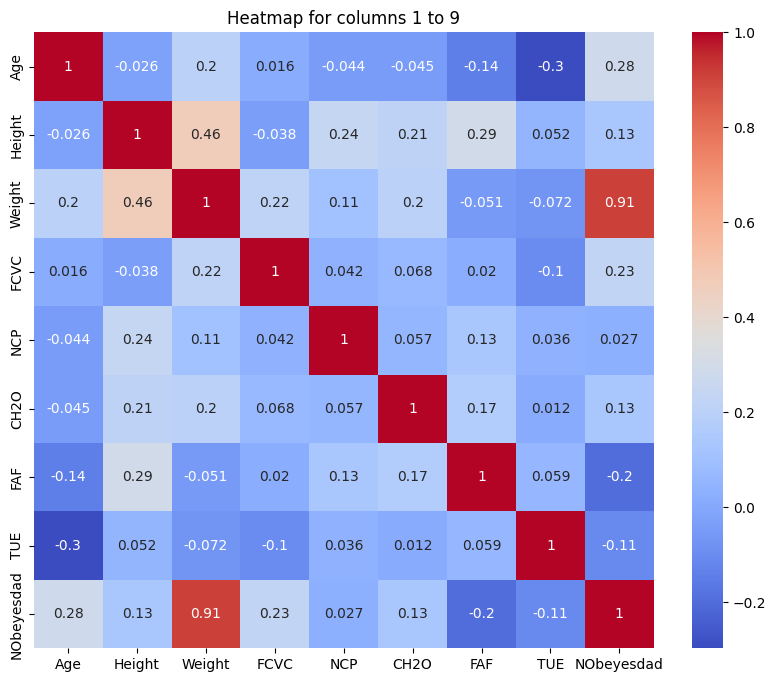

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe and it's already loaded and preprocessed
# Ensure that 'NObeyesdad' is mapped to numerical values as needed

# Number of columns in df
num_cols = len(df.columns)

# Make sure 'NObeyesdad' column is in the dataframe
if 'NObeyesdad' not in df.columns:
    print("The 'NObeyesdad' column does not exist in the dataframe.")



# Loop over each set of 10 columns
for i in range(0, num_cols, 10):
    # Select columns
    if i + 10 < num_cols:
        cols = df.columns[i:i+10]
    else:
        # In case there are fewer than 10 columns left in the last iteration
        cols = df.columns[i:]

    # Always include 'NObeyesdad' column
    if 'NObeyesdad' not in cols:
        cols = cols.insert(len(cols), 'NObeyesdad')

    # Compute correlation and create heatmap
    corr = df[cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(f"Heatmap for columns {i+1} to {min(i+10, num_cols)}")
    plt.show()


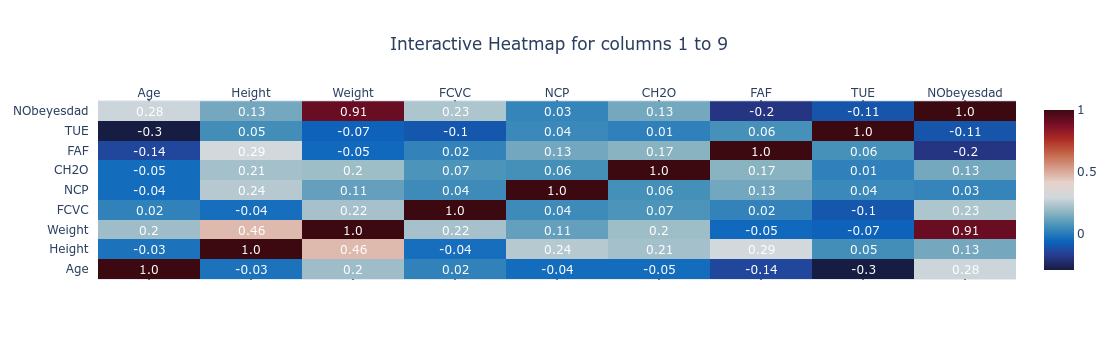

In [53]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

# Assuming df is your dataframe and it's already loaded and preprocessed
# Ensure that 'NObeyesdad' is mapped to numerical values as needed

# Number of columns in df
num_cols = len(df.columns)

# Make sure 'NObeyesdad' column is in the dataframe
if 'NObeyesdad' not in df.columns:
    print("The 'NObeyesdad' column does not exist in the dataframe.")

# Loop over each set of 10 columns
for i in range(0, num_cols, 10):
    # Select columns
    if i + 10 < num_cols:
        cols = df.columns[i:i+10].tolist()
    else:
        # In case there are fewer than 10 columns left in the last iteration
        cols = df.columns[i:].tolist()

    # Always include 'NObeyesdad' column
    if 'NObeyesdad' not in cols:
        cols.append('NObeyesdad')

    # Compute correlation and create heatmap
    corr = df[cols].corr().values
    fig = ff.create_annotated_heatmap(
        z=corr, 
        x=cols, 
        y=cols, 
        colorscale='balance',
        annotation_text=np.around(corr, decimals=2).astype(str),
        showscale=True
    )
    fig.update_layout(
        title_text=f'Interactive Heatmap for columns {i+1} to {min(i+10, num_cols)}',
        title_x=0.5
    )
    fig.show()
